# Week 5. In-class Practice

### TF-IDF練習:使用五月天的歌詞 <3

In [1]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
# sys.path.insert(0, '../modules/')


from fintextmin import *  # 使用 modules 中的 fintextmin 模組

### 從指定路徑中讀入五月天的歌詞.ﾟヽ(*´∀`)ﾉﾟ.

In [2]:
text_list = read_text_folder("./dataset/")
print("document number:", len(text_list))

document number: 30


### 製作詞頻矩陣
下面以 Python 實現製作詞頻矩陣的步驟，並附上對應的`fintextmin`函式

In [15]:
def add_word(list):
    for items in list:
        jieba.add_word(items)

add_word(['五月天', '精選輯'])

## [原生 python 寫法]
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}


## [使用 fintextmin 模組]
stopwords = ['的', '是', '在', '有', '就', '...','一步步'] 
dwc = count_words_in_documents(doc_list = text_list,
                              doc_names = range(len(text_list)),
                              stopwords = stopwords)

In [16]:
## [原生 python 寫法] 
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻

## [使用 fintextmin 寫法]
# doc_word_frequency = create_word_frequency_matrix(dwc)

[('\ufeff', 1),
 ('空無一人', 1),
 ('大街', 1),
 (' ', 40),
 ('闖入', 1),
 ('無人', 1),
 ('婚紗店', 1),
 ('為', 2),
 ('你', 13),
 ('披上', 1)]

In [17]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

D:\PYTHONNNNNNNNNNN\Anaconda\envs\WinterVacationTest\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,一起,浮現,隨浪,街頭,感謝,心上,狂,遺棄,扣,蹉跎,...,沒力氣,沒準備,放縱,最後只,南瓜,合群,滿懷,節奏,只,幽默
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


### 製作TF-IDF矩陣
可以將完成後的tf-idf矩陣與上面的詞頻矩陣比較一下係數

In [18]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm) 


,一起,浮現,隨浪,街頭,感謝,心上,狂,遺棄,扣,蹉跎,...,沒力氣,沒準備,放縱,最後只,南瓜,合群,滿懷,節奏,只,幽默
0,0.050015,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.031986,0.000000
1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.058148,0.00000,0.00000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.027469,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.03752,0.00000,0.000000,0.000000,0.000000
4,0.030445,0.037369,0.000000,0.00000,0.037369,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.037369,0.037369,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.019470,0.000000
5,0.000000,0.000000,0.078512,0.00000,0.000000,0.078512,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.027176,0.000000
8,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.156128,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.023242,0.000000


In [19]:
wfm
N = len(text_list)
dfif = wfm > 0
df = dfif.sum(axis=0)

import math

out = N/df

logdf = [math.log10(i) for i in out.values]

In [20]:
logdf

[1.0,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.1760912590556813,
 1.4771212547196624,
 1.4771212547196624,
 1.1760912590556813,
 1.4771212547196624,
 0.7781512503836436,
 1.0,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.1760912590556813,
 1.4771212547196624,
 1.4771212547196624,
 1.1760912590556813,
 1.1760912590556813,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.0,
 1.4771212547196624,
 1.1760912590556813,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196624,
 1.4771212547196

In [21]:
for i in range(1,N):
    df_tfidf[:i] = wfm[:i] * logdf

In [22]:
wfm['回憶裡面']

0     3.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
Name: 回憶裡面, dtype: float64

In [23]:
df_tfidf['回憶裡面']

0     4.431364
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.000000
Name: 回憶裡面, dtype: float64

### 視覺化TFIDF和原本詞頻矩陣的差異

這邊我們取第一篇文章來比較看看調整前後的詞彙係數

In [24]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('一起', 1.0),
 ('浮現', 0.0),
 ('隨浪', 0.0),
 ('街頭', 0.0),
 ('感謝', 0.0),
 ('心上', 0.0),
 ('狂', 0.0),
 ('遺棄', 0.0),
 ('扣', 0.0),
 ('蹉跎', 0.0)]

### 文字雲

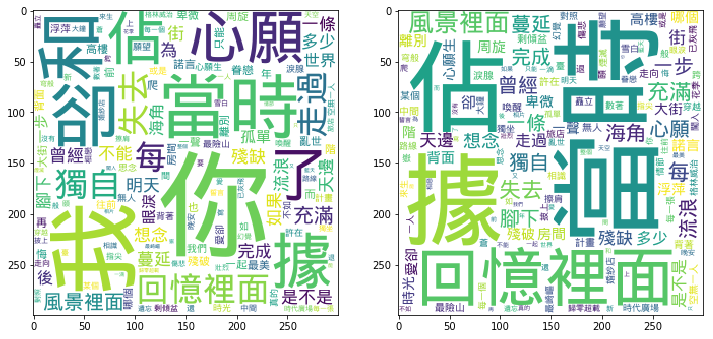

In [25]:
linux_font = 'wqy-microhei.ttc'

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)

ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=300, width=300) 

### 長條圖
可以發現，經過TF-IDF處理之後，比較重要的資訊如「股價」、「747」(註：此指波音747)等詞彙被突顯出來。

每篇文章都會出現的「華航」和所有格用字「的」排序則向下調整。

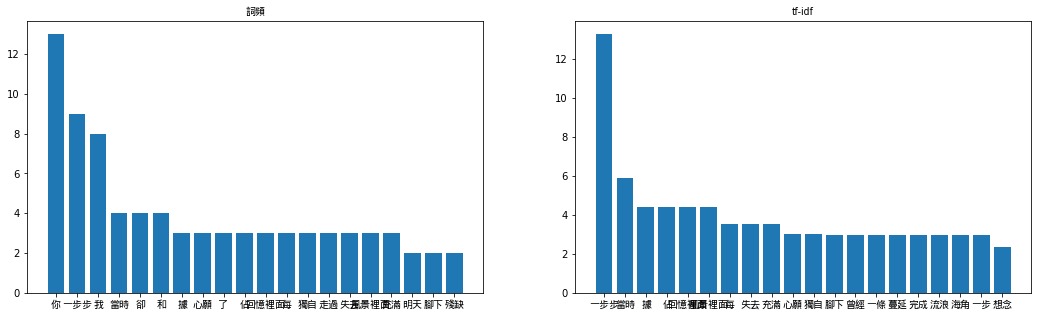

In [14]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf") 